![vki_logo](https://www.skywin.be/sites/default/files/logo-membres/vki_logo_blue_rectangular.jpg)
### MODULO: A package for Multiscale Proper Orthogonal Decomposition
#### Tutorial 1: POD and DMD of a simple test case

This first tutorial illustrate how to compute the Proper Orthogonal Decomposition (POD) and the Dynamic Mode Decomposition (DMD) of a simple dataset. This is the vortex shedding past a cylinder in a 2D simulations. The flow exhibit such a regular periodic behaviour that POD and DMD are barely distiguishable.

For an overview of the theory of these decompositions, see Chapters 6, 7 and 8 in the book [Mendez et al, 2022](https://www.cambridge.org/core/books/datadriven-fluid-mechanics/0327A1A43F7C67EE88BB13743FD9DC8D).


The dataset contains the velocity component and the grid information in 4 txt files. Some key information: the cylinder has a diameter of 15mm, in an overly large domain of 300 x 600 mm. The simulations were carried out in Openfoam
 then exported in a regulard grid.


 The inlet velocity is 10m/s, with a TI of 5%. The sampling frequency in the data is Fs=100 Hz.

 It is important to note that the dataset contains NANs in the location of the cylinder. These can be safely ignored using numpy's nan_to_num, which replaces the Nans with zeros.



#### Load packages and prepare plot customization (Optional)

In [1]:

import numpy as np # we use this to manipulate data 
import matplotlib.pyplot as plt # this is for plotting
import os  # this is to create/rename/delete folders
from modulo.modulo import MODULO # this is to create modulo objects

# this is for plotting/animation purposes
from modulo.utils.others import Animation_2D_CFD_Cyl
from modulo.utils.others import Plot_2D_CFD_Cyl


### Plot Customization (Optional )
fontsize = 16
plt.rc('text', usetex=True)      
plt.rc('font', family='serif')
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['font.size'] = fontsize


#### Download the dataset and store it into a local folder+ prepare folder for results

In [4]:
# Prepare the folder for the results
FOLDER_Cyl_RESULTS='Results_CFD_2D_Cylinder'
if not os.path.exists(FOLDER_Cyl_RESULTS):
    os.mkdir(FOLDER_Cyl_RESULTS)
    
# Folder where we extract the data 
FOLDER='Tutorial_1_2D_Cylinder_CFD'

# First we unzip the file (note that this is the 7th exercise in the old enumeration)
import urllib.request
print('Downloading Data for Tutorial 1...')
url = 'https://osf.io/emgv2/download'
urllib.request.urlretrieve(url, 'Ex_7_2D_CFD.zip')
print('Download Completed! I prepare data Folder')
# Unzip the file 
from zipfile import ZipFile
String='Ex_7_2D_CFD.zip'
zf = ZipFile(String,'r')
zf.extractall('./')
zf.close() 
os.rename('Ex_7_2D_Cylinder_CFD', FOLDER) # rename the data flolder to FOLDER
os.remove(String) # Delete the zip file with the data 
print('Data set unzipped and ready ! ')


Download Completed! I prepare data Folder
Data set unzipped and ready ! 


##### Load the data and create snapshot matrix D


In [5]:
# Read all the 313 snapshots. Note that the mexh consists of 301x201 elements
U=np.loadtxt(FOLDER + os.sep+ 'U_Cyl.txt')                              # U component
V=np.loadtxt(FOLDER + os.sep+ 'V_Cyl.txt')                              # V component
X=np.loadtxt(FOLDER + os.sep+ 'X_Cyl.txt')                            # X coordinates
Y=np.loadtxt(FOLDER + os.sep+ 'Y_Cyl.txt')                            # Y coordinates

# We rebuild the mesh as a Cartesian grid
Xg,Yg=np.meshgrid(X,Y)
n_x=len(Y); n_y=len(X); nxny=n_x*n_y
n_s=2*nxny; n_t=np.shape(U)[1]

# the time discretization is 
t=np.arange(0,n_t)*1/1000

# The snapshot matrix is 
D = np.zeros((n_s, n_t))

for k in range(0, n_t):
    D[:int(n_s/2), k] = U[:, k]
    D[int(n_s/2):, k] = V[:, k]

##### Plot one snapshot and make a gif

We use the functions Plot_2D_CFD_Cyl and Animation_2D_CFD_Cyl available in 'others'. This file collects various auxiliary functions for the tutorials, for example for plotting and/or creating animations. 

In [6]:
# Here we make a plot of the snapshot number 11
Plot_2D_CFD_Cyl(Xg,Yg,U,V,k=11,
                Name=FOLDER+os.sep+'Snapshot_11_Test.png')

# Here we make an animation of the dataest from snapshot 1 until 100 with steps of 1
Name_GIF=FOLDER+os.sep+'Animation_TEST.gif'
Animation_2D_CFD_Cyl(Name_GIF,D,Xg,Yg,1,100,1)

C:\Users\mendez\OneDrive - vki.ac.be\Documents\GitHub\modulo_vki\examples\modulo\utils\others.py:213: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)


Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image expo

'Gif Created'

## Step 1 : Dynamic Mode Decomposition

We perform the DMD using the scipy's sparse solver as svd solver.
The other SVD solvers are 'svd_numpy', 'svd_scipy_sparse', 'svd_sklearn_randomized', 'svd_sklearn_truncated'. Test them. The first is the most accurate but also the most expensive computationally. The third is the fastest, but less accurate. The second is a reasonable compromise. The last lets skitlearn select which solver to use (see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) 

In [7]:
# --- Initialize MODULO object
m = MODULO(data=np.nan_to_num(D), svd_solver='svd_scipy_sparse')
# --- Compute DMD without exporting results (first input) for a sampling frequency of Fs=1000 Hz (second input)
Phi_D, Lambda, freqs, a0s = m.compute_DMD_PIP(False, F_S=1000)

SVD of D1 rdy
reduced propagator rdy
 lambdas and freqs rdy
Phi_D rdy
Sigma_D rdy


#### Plot and export the DMD spectra and the first 6 DMD spatial structures

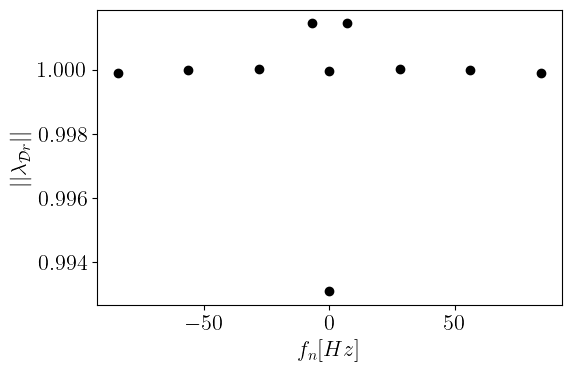

Image exported
Image exported
Image exported
Image exported
Image exported
Image exported


<Figure size 640x480 with 0 Axes>

In [8]:
FOLDER_DMD_RESULTS=FOLDER_Cyl_RESULTS+os.sep+'DMD_Results_Cylinder_CFD'
if not os.path.exists(FOLDER_DMD_RESULTS):
    os.mkdir(FOLDER_DMD_RESULTS)


fig, ax = plt.subplots(figsize=(6, 4)) # This creates the figure
plt.plot(freqs,np.abs(Lambda),'ko') 
ax.set_xlabel('$f_n [Hz]$',fontsize=16)
ax.set_ylabel('$||\lambda_{\mathcal{D}r}||$',fontsize=16)
plt.tight_layout()
Name=FOLDER_DMD_RESULTS+os.sep+'lambdas_D_Freqs.png'
plt.show()
plt.savefig(Name, dpi=300) 


# We plot the spatial structures of these mode:
U_D=np.real(Phi_D[0:nxny,:])
V_D=np.real(Phi_D[nxny::,:])

for K in range(6):
 Name=FOLDER_DMD_RESULTS+os.sep+'DMD_Mode_'+str(K)+'.png'
 #plt.title('$\mathcal{R}\{ \Phi_{\mathcal{D}1}(\mathbf{x}_i)\}$',fontsize=18)
 Plot_2D_CFD_Cyl(Xg,Yg,U_D,V_D,k=K,CL=0,Name=Name)



## Step 2 : Proper Orthogonal Decomposition

We compute the POD using the snapshot approach (i.e. computing first K) or using the randomized SVD approach (test both and compare results and computational cost! )


In [10]:
# Create the folder to export the POD results
FOLDER_POD_RESULTS=FOLDER_Cyl_RESULTS+os.sep+'POD_Results_Cylinder_CFD'
if not os.path.exists(FOLDER_POD_RESULTS):
    os.mkdir(FOLDER_POD_RESULTS)

# Approach using the snapshot method (computing first K). We do not export the decomposition results
#Phi_POD, Psi_POD, Sigma_POD = m.compute_POD_K(False) # uncomment one of these 

# Approach using the randomized svd. We do not export the decomposition results 
Phi_POD, Psi_POD, Sigma_POD = m.compute_POD_svd(False) # uncomment one of these    
    

We export the first 6 modes as before. Compare the results in the relevant folders!

Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_0.png Saved
Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_1.png Saved
Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_2.png Saved
Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_3.png Saved
Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_4.png Saved
Image exported
Results_CFD_2D_Cylinder\POD_Results_Cylinder_CFD\POD_Mode_PSI_5.png Saved


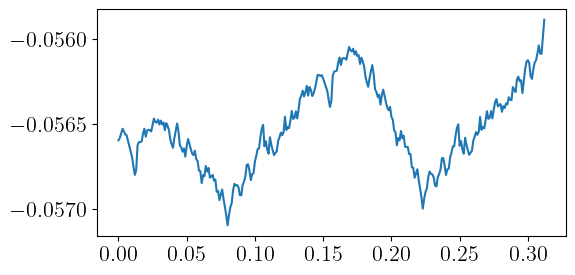

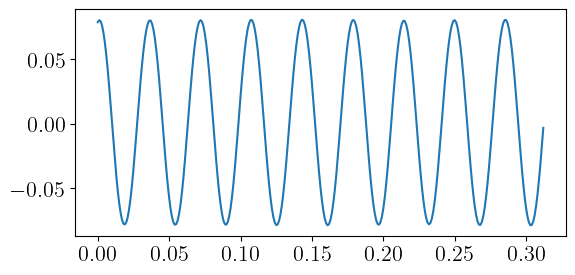

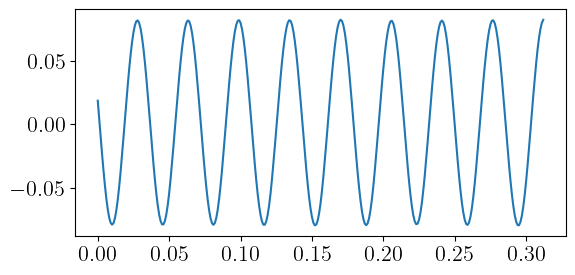

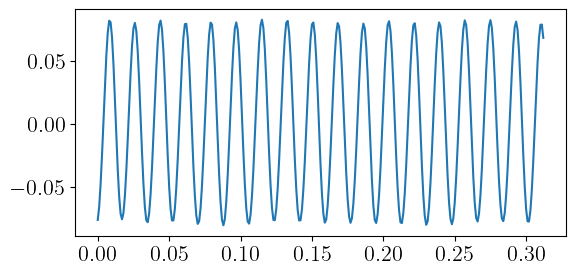

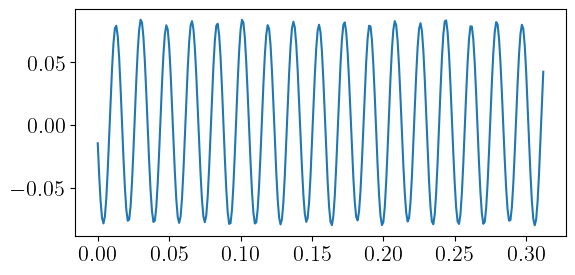

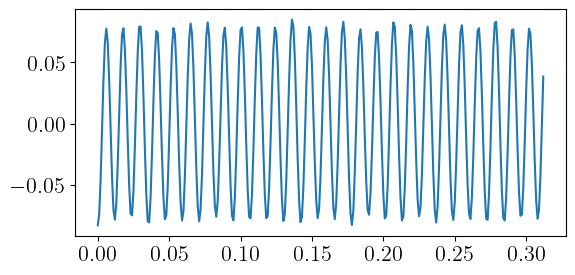

In [11]:
for K in range(6):
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Mode_'+str(K)+'.png'
 #plt.title('$\Phi_{\mathcal{P}}(\mathbf{x}_i)$',fontsize=18)
 Plot_2D_CFD_Cyl(Xg,Yg,U_D,V_D,k=K,CL=0,Name=Name)
 #Then plot their temporal evolution
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 plt.plot(t,Psi_POD[:,K])
 plt.tight_layout(pad=1, w_pad=0.5, h_pad=1.0)
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Mode_PSI_'+str(K)+'.png' 
 print(Name+' Saved')
 plt.savefig(Name, dpi=300)  

Compare the spatial structures of the two decompositions! Remarkably, the POD is picking harmonic modes (even if no constraints enforced this, contrary to the DMD). Here is an approximation of the data using the leading 3 POD modes, followed by a script to animate the reconstruction. Compare this gif with the one build from the dataset. Do you see any appreciable difference ?

In [13]:
# Here is the approximation with the leading 3 POD modes
R=3
D_P=np.real(np.linalg.multi_dot([Phi_POD[:,0:R],
                                 np.diag(Sigma_POD[0:R]),
                                 Psi_POD[:,0:R].T]) )
Error=np.linalg.norm(m.D-D_P)/np.linalg.norm(m.D)

# Here is the animation of the approximated fields
Name_GIF=FOLDER+os.sep+'Animation_Approximation.gif'   
Animation_2D_CFD_Cyl(Name_GIF,D_P,Xg,Yg,1,100,1)

Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image exported
Image expo

'Gif Created'